# Q1 (Company_Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd=pd.read_csv('Company_Data.csv')
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [5]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
cd['Sales'] = pd.cut(x=cd['Sales'],bins=[0, 7 , 12, 17], labels=['Low','Medium', 'High'], right = False)
cd['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396       Low
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [6]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
# complete company dataset
label_encoder=preprocessing.LabelEncoder()
cd['Sales']=label_encoder.fit_transform(cd['Sales'])
cd['ShelveLoc']=label_encoder.fit_transform(cd['ShelveLoc'])
cd['Urban']=label_encoder.fit_transform(cd['Urban'])
cd['US']=label_encoder.fit_transform(cd['US'])
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [8]:
x=cd.iloc[:,1:11]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [9]:
y=cd['Sales']
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    1
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [10]:
cd['Sales'].unique()

array([2, 1, 0])

In [11]:
cd.Sales.value_counts()

2    189
1    184
0     27
Name: Sales, dtype: int64

In [12]:
colnames=list(cd.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [13]:
# splitting data into tranining and testing data set
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=40)

### Buliding Decision Tree Classifier using Entropy Criteria

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

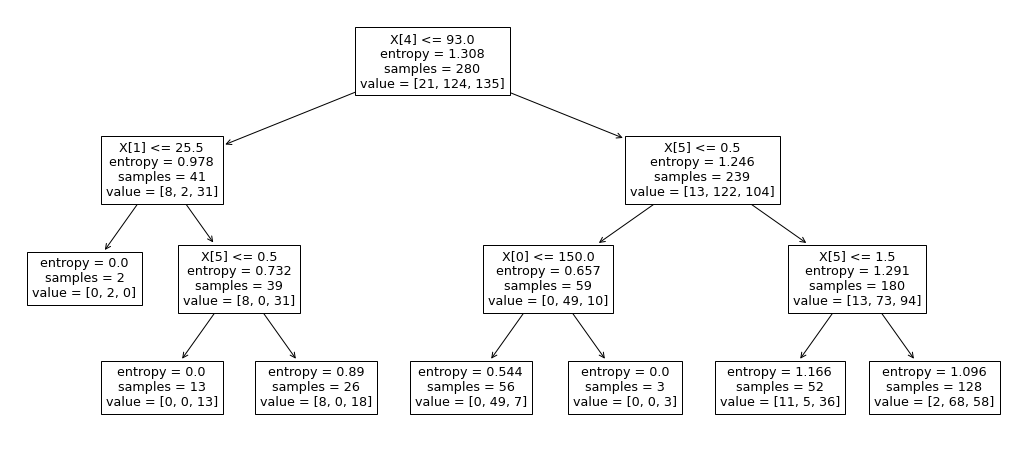

In [15]:
fig,axes=plt.subplots(figsize=(18,8))
tree.plot_tree(model);

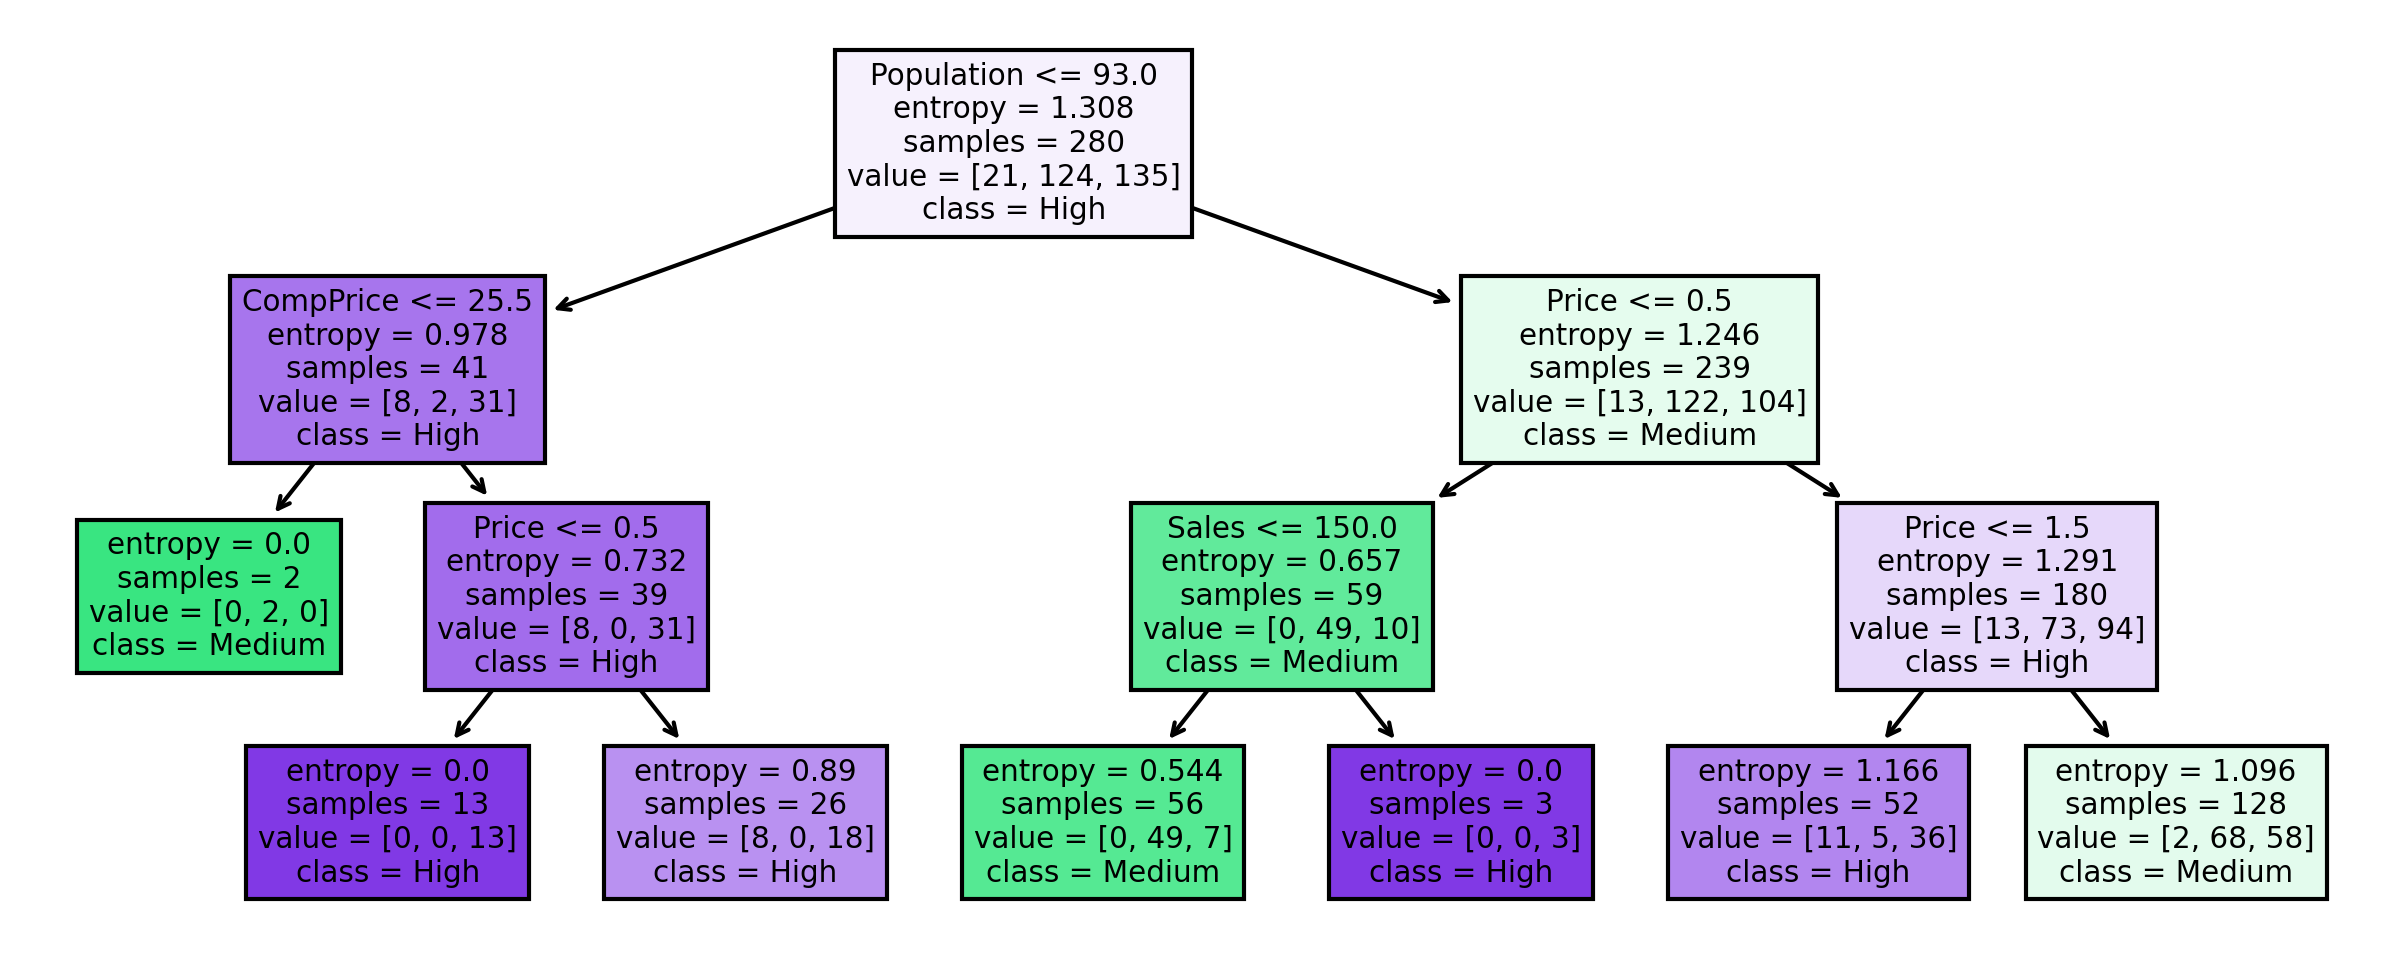

In [16]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium', 'High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,4),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [17]:
# predict on test data
preds=model.predict(x_test)
# getting the count of each category
pd.Series(preds).value_counts()

1    79
2    41
dtype: int64

In [18]:
preds

array([2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [19]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,1,2
Sales,,
0,2,4
1,50,10
2,27,27


In [20]:
# accuracy
np.mean(preds==y_test)

0.6416666666666667

### Building Decision Tree Classifier (CART) using Gini Criteria 

In [21]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

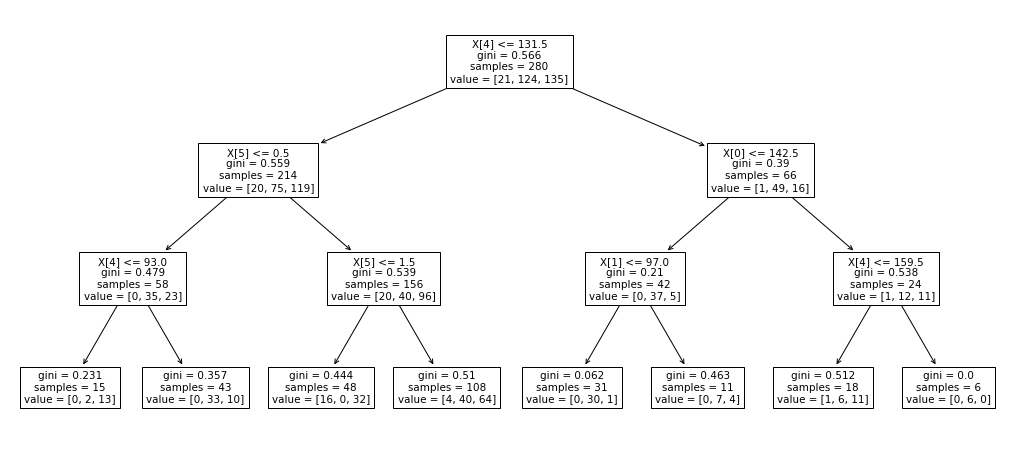

In [22]:
fig,axes=plt.subplots(figsize=(18,8))
tree.plot_tree(model_gini);

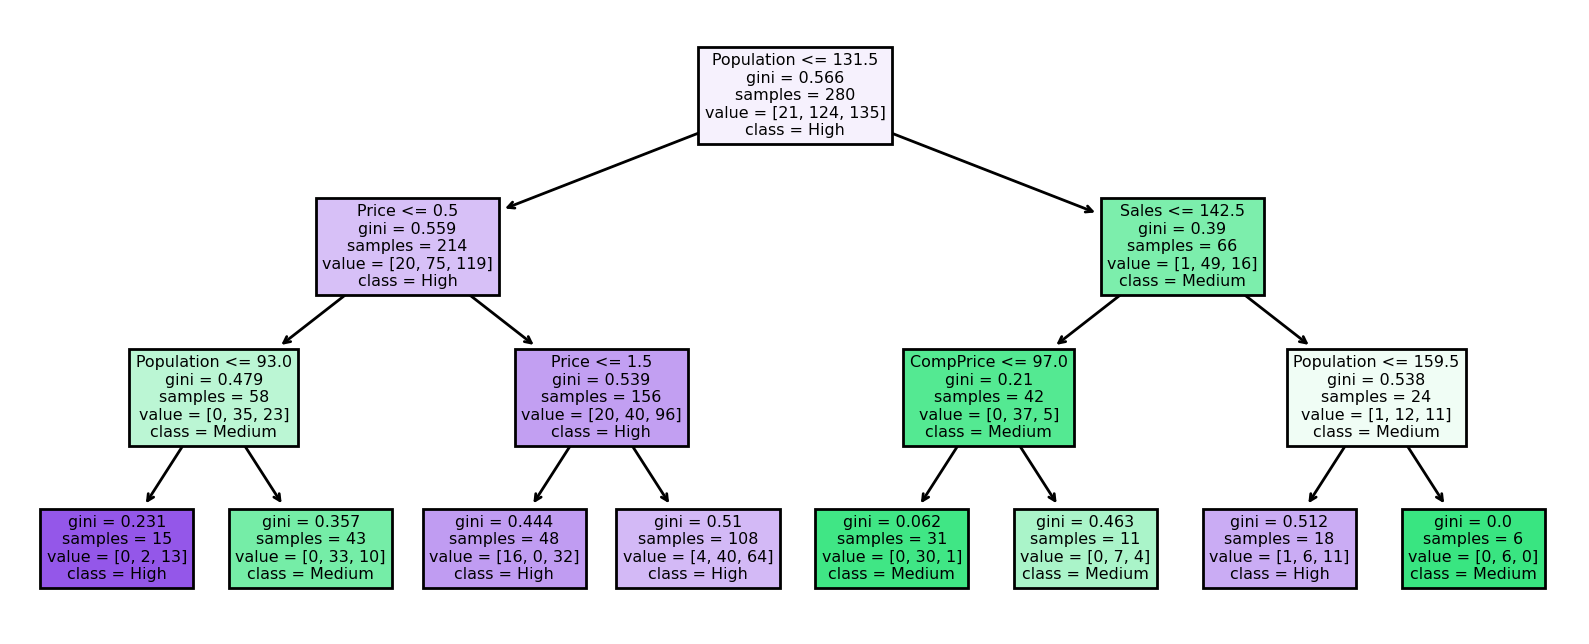

In [23]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium', 'High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,4),dpi=200)
tree.plot_tree(model_gini,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [24]:
# predict on test data
preds=model_gini.predict(x_test)
# getting the count of each category
pd.Series(preds).value_counts()

2    82
1    38
dtype: int64

In [25]:
preds

array([1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2])

In [26]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,1,2
Sales,,
0,0,6
1,29,31
2,9,45


In [27]:
# accuracy
np.mean(preds==y_test)

0.6166666666666667

# Q2 (Fraudcheck)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
fd=pd.read_csv("Fraud_check.csv")
fd

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [30]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [31]:
fd.shape

(600, 6)

In [32]:
fd.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [33]:
# renaming columns
fds=fd.rename({'Undergrad':'undergrad','Marital.Status':'maritalstatus','Taxable.Income':'taxableincome','City.Population':'citypopulation','Work.Experience':'workexperience','Urban':'urban'},axis=1)
fds

,undergrad,maritalstatus,taxableincome,citypopulation,workexperience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [34]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [35]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
fds['taxableincome']=pd.cut(x=fds['taxableincome'],bins=[10002,30000,99620],labels = ['Risky', 'Good'])
fds

,undergrad,maritalstatus,taxableincome,citypopulation,workexperience,urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [36]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['undergrad','maritalstatus', 'urban'])
check1=encoder.fit_transform(fds)
check1

,undergrad,maritalstatus,taxableincome,citypopulation,workexperience,urban
0,1,1,Good,50047,10,1
1,2,2,Good,134075,18,1
2,1,3,Good,160205,30,1
3,2,1,Good,193264,15,1
4,1,3,Good,27533,28,2
...,...,...,...,...,...,...
595,2,2,Good,39492,7,1
596,2,2,Good,55369,2,1
597,1,2,Good,154058,0,1
598,2,3,Good,180083,17,2


In [37]:
x=check1.drop(['taxableincome'],axis=1)
y=check1['taxableincome']

In [38]:
x

,undergrad,maritalstatus,citypopulation,workexperience,urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [39]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxableincome, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [40]:
# splitting data into tranining and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

**Buliding Decision Tree Classifier using Entropy Criteria**

In [41]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
# predicting on test data set 
preds=model1.predict(x_test)
# getting the count of each category
pd.Series(preds).value_counts()

Good     178
Risky      2
dtype: int64

In [43]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,Good,Risky
taxableincome,,
Risky,40,0
Good,138,2


In [44]:
# accuracy
np.mean(preds==y_test)

0.7666666666666667

Text(0.5, 1.0, 'Decision tree')

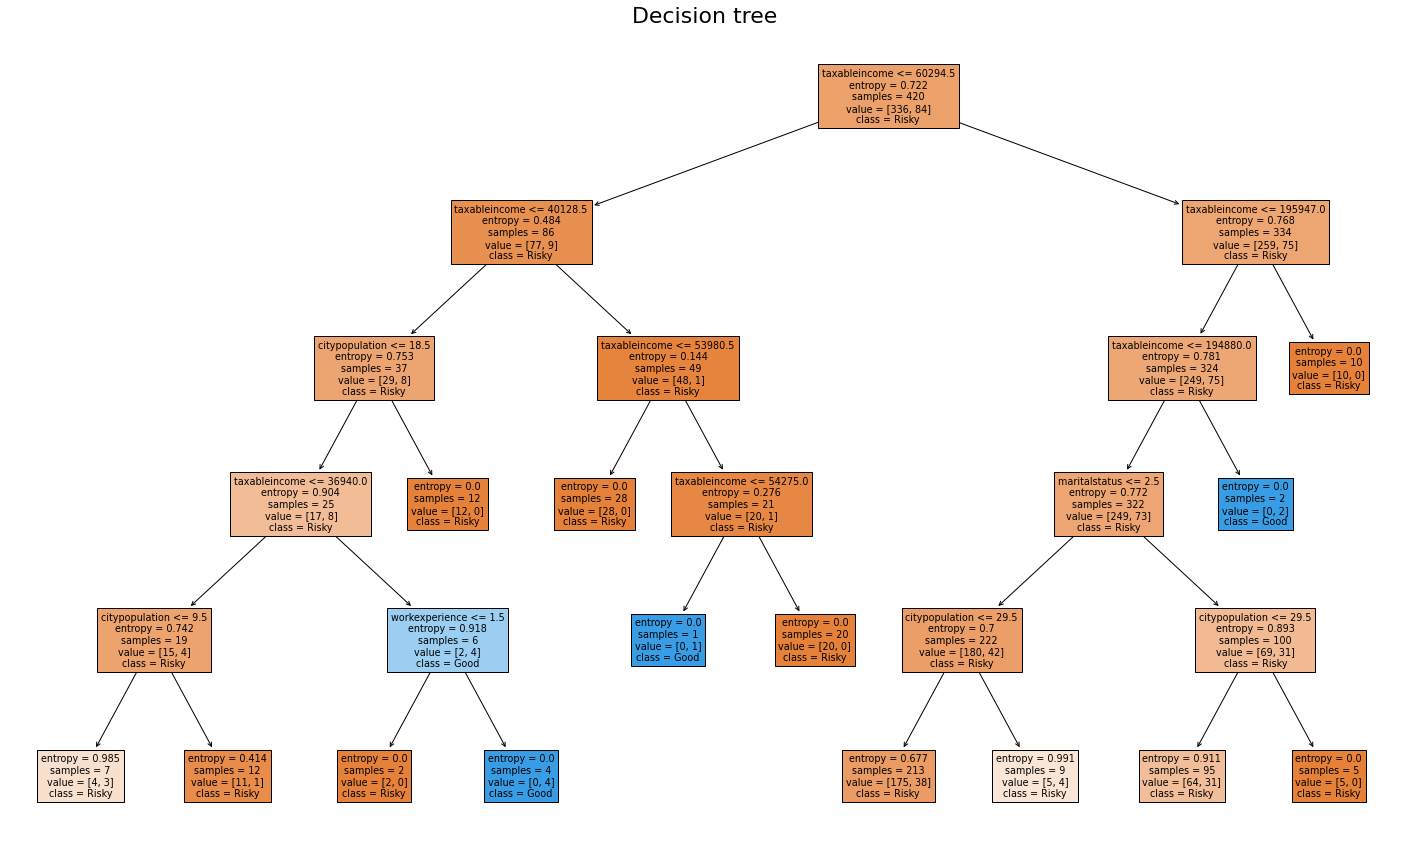

In [45]:
# Buliding Decision Tree
fig=plt.figure(figsize=(25,15))
fig=tree.plot_tree(model1,feature_names=['undergrad','maritalstatus','taxableincome','citypopulation','workexperience','urban'],class_names=['Risky','Good'],filled=True)
plt.title('Decision tree',fontsize=22)

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [46]:
model1_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)
model1_gini

DecisionTreeClassifier(max_depth=5)

In [47]:
model1_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
# predict on test data
pred=model1_gini.predict(x_test)
# getting the count of each category
pd.Series(preds).value_counts()

Good     178
Risky      2
dtype: int64

In [49]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,Good,Risky
taxableincome,,
Risky,40,0
Good,138,2


In [50]:
# accuracy
np.mean(preds==y_test)

0.7666666666666667

Text(0.5, 1.0, 'Decision tree')

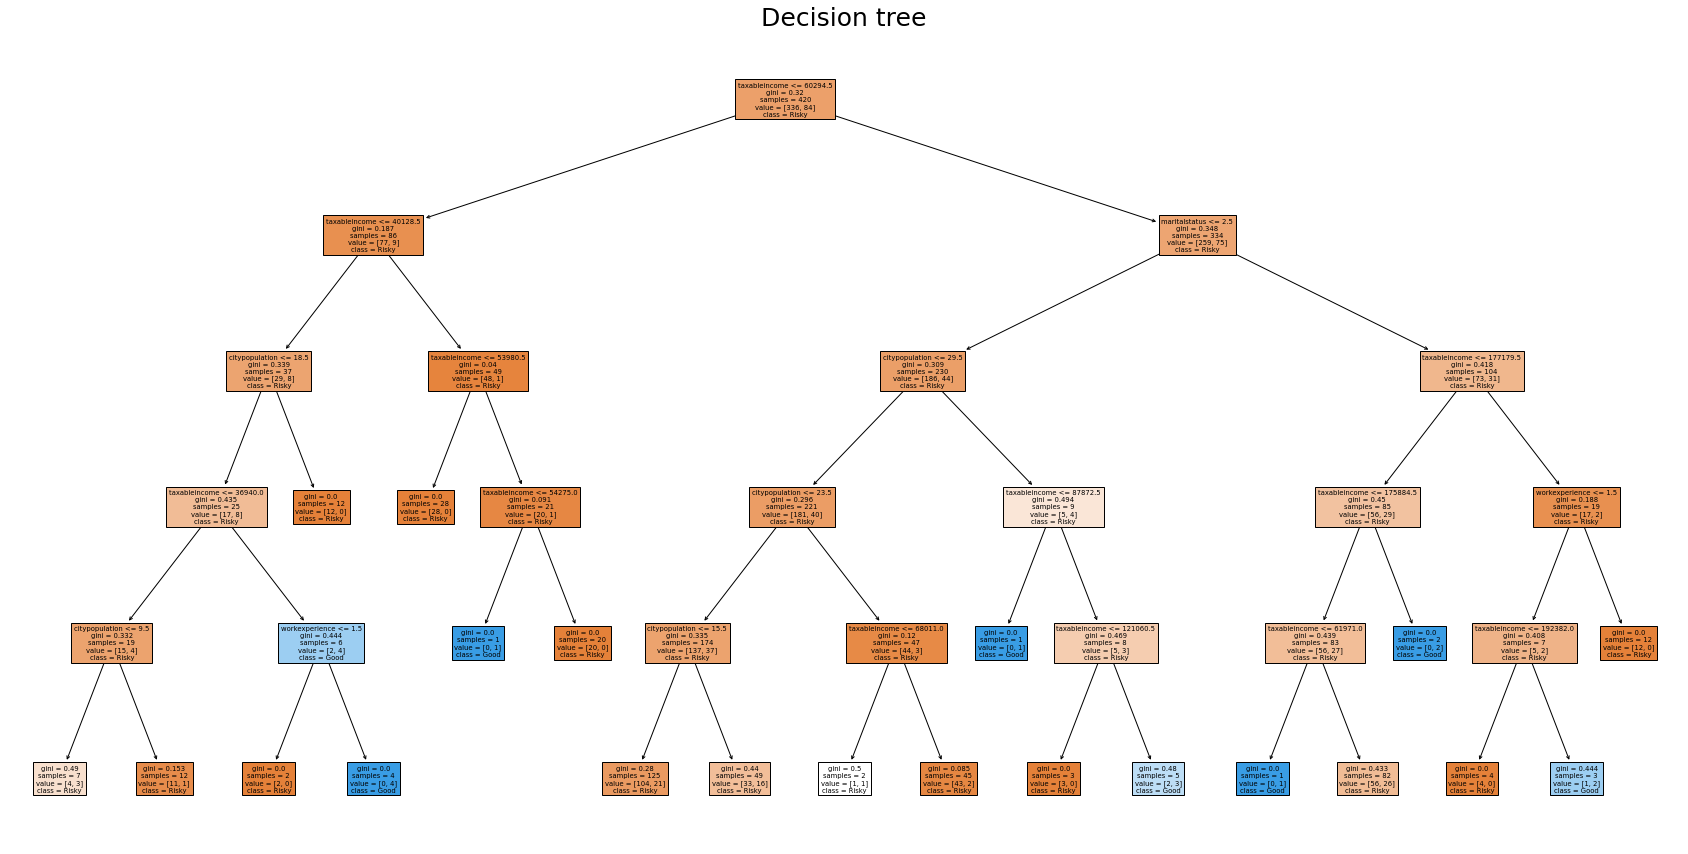

In [51]:
# Buliding Decision Tree
fig=plt.figure(figsize=(30,15))
fig=tree.plot_tree(model1_gini,feature_names=['undergrad','maritalstatus','taxableincome','citypopulation','workexperience','urban'],class_names=['Risky','Good'],filled=True)
plt.title('Decision tree',fontsize=25)